In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [7]:
!pip3 install vpython 

     |████████████████████████████████| 3.7 MB 605 kB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 8.5 MB/s eta 0:00:01


  Created wheel for simpervisor: filename=simpervisor-0.3-py3-none-any.whl size=5196 sha256=20aa36b548764323ea603d2bc03be0625b383b91ffb99b92ebc1dc5e70296e39
  Stored in directory: /root/.cache/pip/wheels/6d/02/72/27a10faccec8d314aa88ac6c099e11ab704497beaaf26a24f9
Successfully built simpervisor


In [8]:
# Load libraries
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sns

# Import supplementary visualizations code visuals.py
#import visuals as vs
from vpython import *
# Pretty display for notebooks
%matplotlib inline
"""visual module has been renamed to vpython lately.

So to run this now, you first install vpython like:
sudo pip3 install vpython 
then replace the line:

from visual import *
with

from vpython import *
That worked for me.
credits to : https://stackoverflow.com/questions/28592211/importerror-no-module-named-visual
"""


<IPython.core.display.Javascript object>

'visual module has been renamed to vpython lately.\n\nSo to run this now, you first install vpython like:\nsudo pip3 install vpython \nthen replace the line:\n\nfrom visual import *\nwith\n\nfrom vpython import *\nThat worked for me.\ncredits to : https://stackoverflow.com/questions/28592211/importerror-no-module-named-visual\n'

In [9]:
data = pd.read_csv('../input/bostonhoustingmlnd/housing.csv')
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [10]:
# Load the Boston housing dataset

prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [11]:
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [12]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13


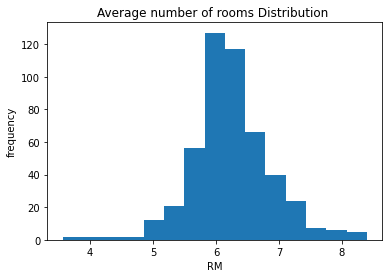

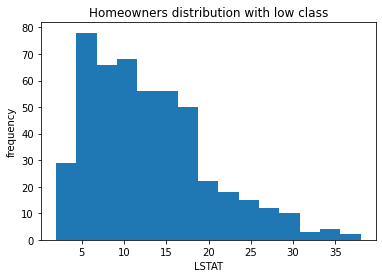

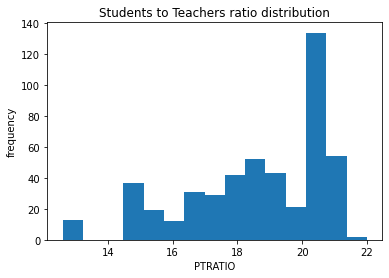

In [13]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['RM'], bins = 15)  
plt.title("Average number of rooms Distribution ")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['LSTAT'], bins = 15)  
plt.title("Homeowners distribution with low class")
plt.xlabel("LSTAT")
plt.ylabel("frequency")
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['PTRATIO'], bins = 15)  
plt.title("Students to Teachers ratio distribution")
plt.xlabel("PTRATIO")
plt.ylabel("frequency")
plt.show()

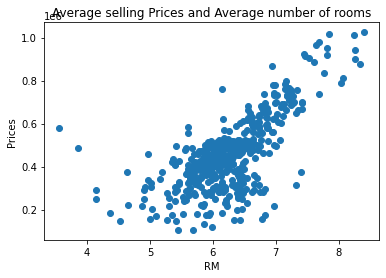

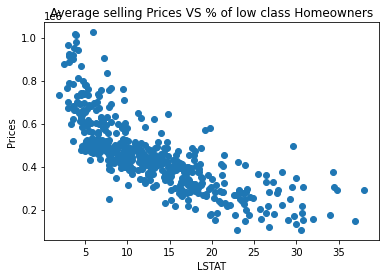

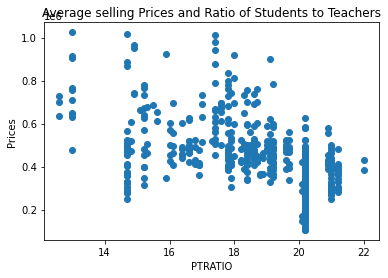

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(data['RM'], data['MEDV']) 
#Lables & Title
plt.title("Average selling Prices and Average number of rooms")
plt.xlabel("RM")
plt.ylabel("Prices")
plt.show()

#                       LSTAT VS PRICES
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(data['LSTAT'], data['MEDV'])  
plt.title("Average selling Prices VS % of low class Homeowners")
plt.xlabel("LSTAT")
plt.ylabel("Prices")
plt.show()

#                       PTRATIO VS PRICES
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(data['PTRATIO'], data['MEDV'])  
plt.title("Average selling Prices and Ratio of Students to Teachers")
plt.xlabel("PTRATIO")
plt.ylabel("Prices")
plt.show()


In [17]:
def df_to_plotly(df):
    return {'z': data.values.tolist(),
            'x': data.columns.tolist(),
            'y': data.index.tolist()}

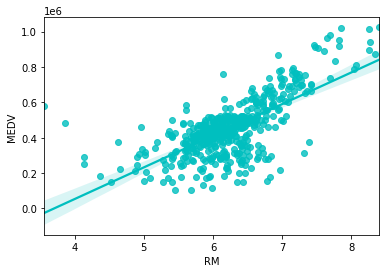

In [18]:
#plot scatter between prices and number of rooms.
sns.regplot(x=features['RM'],y=prices,color='c')
sns.set_style("whitegrid")

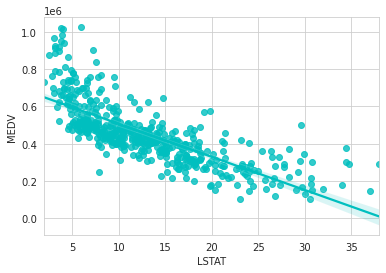

In [19]:
#plot scatter between prices and percent of lower class workers.
sns.regplot(x=features['LSTAT'], y=prices ,color='c')
sns.set_style("whitegrid")

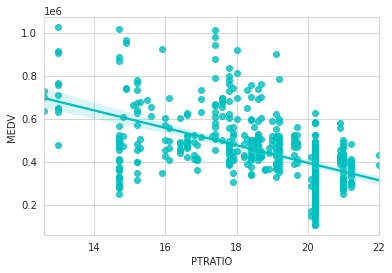

In [20]:
#plot scatter between prices and ratio of student and teacher.
sns.regplot(x=features['PTRATIO'], y=prices, color='c')
sns.set_style("whitegrid")